In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests # might need to be installed
%matplotlib inline

In [2]:
train = pd.read_csv(r'train1.csv')
test = pd.read_csv(r'test.csv')

In [3]:
# getting a data dictionary
# response = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564407075&Signature=Iduf4UDvx2Cei5S9B7A%2B%2Fz3u%2Ff8GG0RxvpfMu5IHRtJOFBsjq806B2sSr6zucZBwJeBNSOuIpOssfa4i%2BYS8ybrJgaHnA%2Fqkcox6ZsD8BLIl3yTHjwmfkie2ohGSI0bdZLiXblBWps8xJ8sGZPnmTegLYLhFgrA7O0BEF5dIXrFVYufTcndkOeOyYm3fopGjTablaxWOUyhmd43WfOxADJInaMqUk37SBzVD4jD1bj%2F%2B%2FJkK7OeTvUIBJOR3EXij97rhVqcZNdxTttF91t0W3HFcqJrRhrw5%2BKvZmHNzsT5AO164QSjlFqT5kU3dZWoZqxdDOxImVvr%2Fw2m4IRZGCw%3D%3D')
# dict = response.text


In [4]:
# print(dict)

In [5]:
# train.describe().T
# test.describe().T

In [ ]:
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [7]:
# pandas_profiling.ProfileReport(train)

### Dealing with missing values in obvious features

In [8]:
# Type of alley access to property
# print(train['Alley']).column_name()
# for c in train.columns:
#     print(train[c].value_counts())
#     print("Number of NaNs in the column {} is {}".format(c, train[c].isna().sum()))

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['Alley'].fillna('NA', inplace = True)
train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
train['PoolQC'].fillna('NA', inplace = True)
train['Fence'].fillna('NA', inplace = True)
train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
test['Alley'].fillna('NA', inplace = True)
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

In [9]:
# Let's look a column name, and a number of NaNs
# train.isna().sum()
#or 
train.columns[train.isna().any()].tolist()

[]

### Feature engineering part

#### Categorical are categorical; numeric are numeric

In [10]:
train['Id'] = train['Id'].astype('category') 
train['MSSubClass'] = train['MSSubClass'].astype('category')
# train['YearBuilt'] = train['YearBuilt'].astype('category')
# train['YrSold'] = train['YrSold'].astype('category')
# train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
train['Fence'] = train['Fence'].astype('category')
train['MiscFeature'] = train['MiscFeature'].astype('category')
train['MiscVal'] = train['MiscVal'].astype('category')

In [11]:
[col for col in train.columns.tolist() if train[col].dtype not in ['object']] 

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Need to check cardinality in train and test sets and look at the outlies in columns to which it applies

In [ ]:
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, train[col].nunique()-test[col].nunique()))
# cardinality of train is always higher than that of test        

#### Exploring columns where cardinality in train and test sets isn't the same

In [13]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [ ]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        
# cols_list1 = [cols_list1.append(train.col) for col in train.columns 
#               if (train[col].nunique()-test[col].nunique()) != 0]

# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

In [ ]:
# Scatterplots: numeric columns vs. SalePrice in the train set 
# numeric columns
# digit_cols = list(train.select_dtypes(include=[np.number]).columns.values)
digit_cols = train.select_dtypes(include=['float64','int64']).columns.to_list()
# digit_cols = digit_cols[2:] # don't need the first two columns
# scatter plots: digit_cols vs. SalePrice

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'SalePrice', data = train)
    
# LotFrontage, LotArea, YearBuilt, TotalBsmtSF, GrLivArea, 1stFlrSF, 2ndFlrSF, GarageArea seem to have linear relationships

In [16]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

In [17]:
# turning object columns into category columns
for i in train.select_dtypes(include='object').columns.to_list():
    train[i] = train[i].astype('category')

In [18]:
# list w/ categorical variables
cater_cols = train.select_dtypes(include='category').columns.to_list()

In [ ]:
# categorical variables vs. SalePrice TAKES TIME
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [ ]:
# Going back to columns with different cardinality cols_list
for cols in cols_list:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [21]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

In [22]:
digit_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'SalePrice']

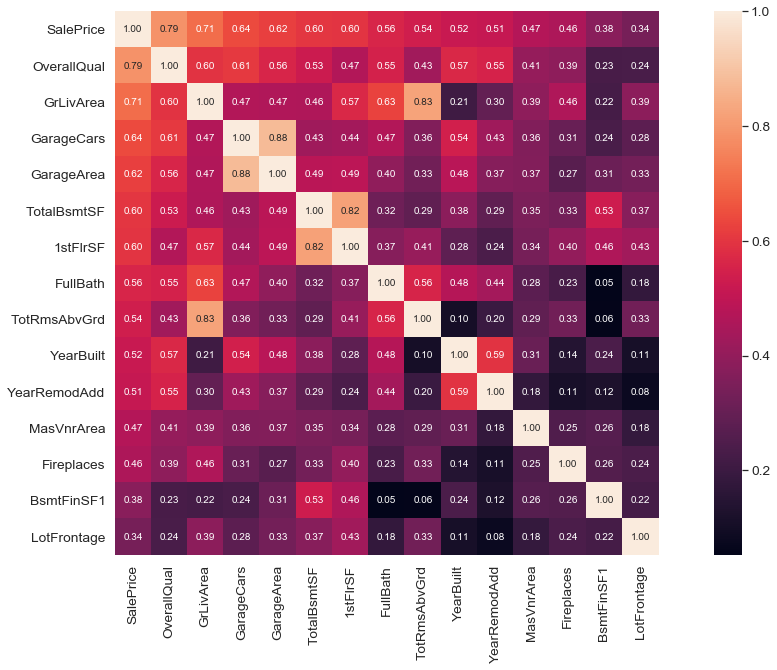

In [23]:
corrmat = train.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# OverallQual, GrLivArea: Above grade (ground) living area square feet -- the strongest
#GarageCars and GarageArea is probably the same. Keeping only GarageCars because it's stronger
#TotalBsmtSF and 1stFlrSF are similar, keeping only TotalBsmntSF

In [ ]:
# Looking at these variables again
sns.distplot(train['GrLivArea'])
plt.axvline(train['GrLivArea'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['TotalBsmtSF'])
plt.axvline(train['TotalBsmtSF'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['1stFlrSF'])
plt.axvline(train['1stFlrSF'].mean(), color="k", linestyle="--")
#all look normal

In [25]:
plt.clf()
plt.close()

In [26]:
#and for the train set
train['Remodeled Y/N'] = np.where(train['YearRemodAdd'] ==train['YearBuilt'], 'No', 'Yes')
train['Age when Sold'] = train['YrSold'] - train['YearRemodAdd']
train['Remodeled Y/N'] = train['Remodeled Y/N'].astype('category')

In [ ]:
sns.boxplot(x ='Remodeled Y/N' , y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'Age when Sold', y = 'SalePrice', data = train)
# nothing crazy

In [28]:
#adding a new column totSqFt
#TotalBsmtSF + GrLivArea + 1stFlrSF
train['totSqFt'] = train['TotalBsmtSF'] + train['GrLivArea'] + train['1stFlrSF'] + train['2ndFlrSF']
# combo['totSqFt'] = combo['TotalBsmtSF'] + combo['GrLivArea']

In [29]:
#adding a new column totBath
# FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
train['totBath'] = train['FullBath'] + 0.5*train['HalfBath'] + train['BsmtFullBath'] + 0.5*train['BsmtHalfBath']

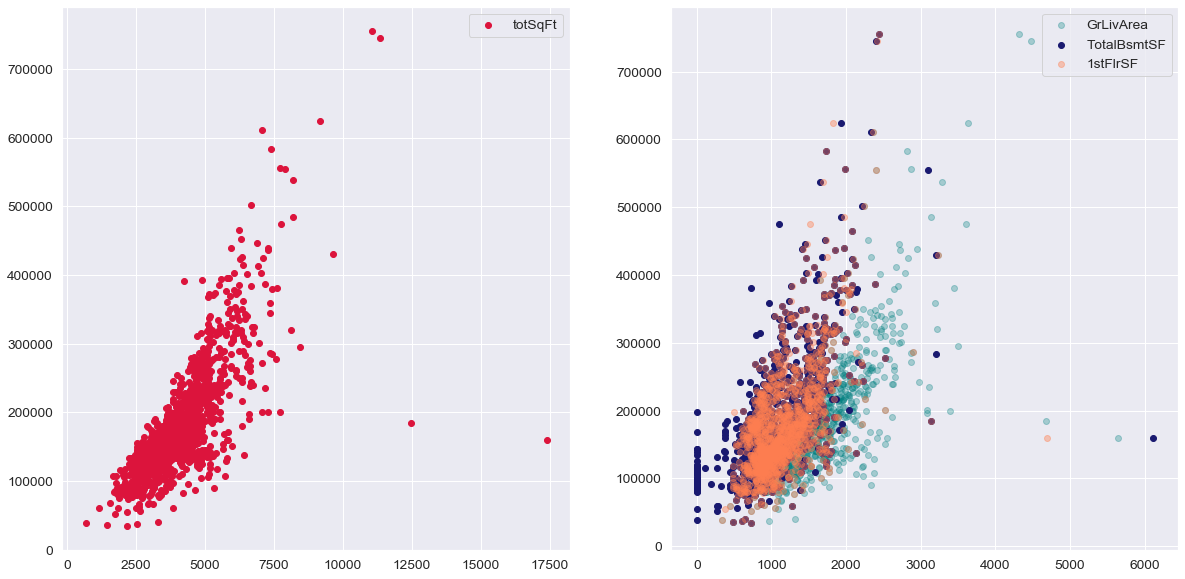

In [30]:
# Looking at how the new feature compares to old three 
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(train['totSqFt'],train['SalePrice'], color = 'crimson', label = 'totSqFt')

ax2.scatter(train['GrLivArea'],train['SalePrice'], color = 'teal', alpha = 0.3, label ='GrLivArea')
ax2.scatter(train['TotalBsmtSF'],train['SalePrice'], color = 'midnightblue', label = 'TotalBsmtSF')
ax2.scatter(train['1stFlrSF'],train['SalePrice'], color = 'coral', alpha = 0.4, label = '1stFlrSF')

ax1.legend()
ax2.legend()
plt.show()

In [31]:
# Remove variables that were used to create new features
cols_2_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','Id','2ndFlrSF',
                'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','GarageYrBlt']
train_rem = train.copy()
train_rem.drop(cols_2_remove, axis = 1, inplace = True)


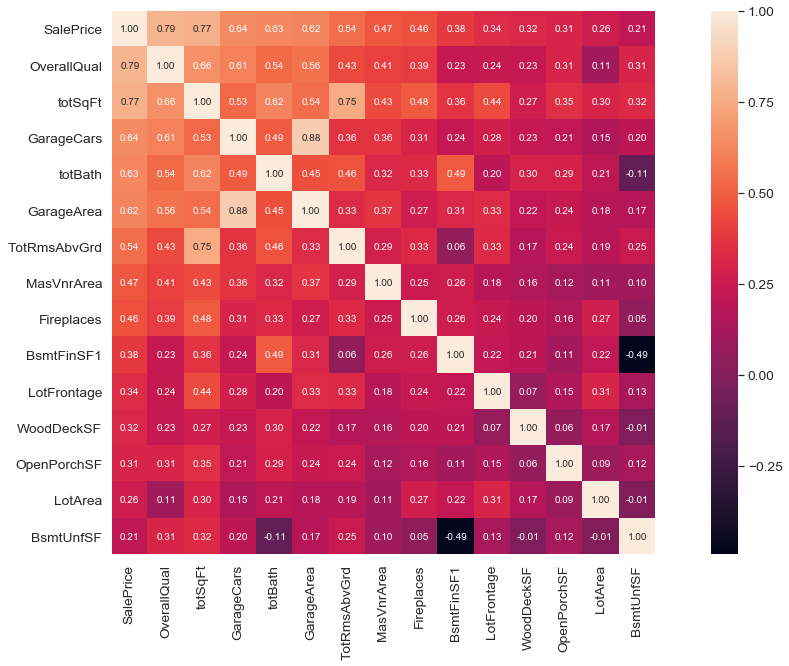

In [32]:
# rebuilding the correlation map for the new dataset
corrmat_rem = train_rem.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat_rem.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_rem[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
# Remove features with the correlation coefficient below a certain threshold
corrmat_rem = train_rem.corr()
k=15
cols_min = corrmat_rem.nsmallest(k, 'SalePrice')['SalePrice']

In [34]:
# ix = train_rem.corr().sort_values('SalePrice', ascending=True).index
# # train_rem.loc[:, ix]
# ix


corr_matrix1 = train_rem.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=True))

In [35]:
# def correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] < threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)

In [36]:
# train_rem.corr()['SalePrice'].sort_values()

In [37]:
# number of features that are not category and that can be correlated with SalePrice 
len(train_rem.select_dtypes(exclude='category').columns.to_list())

#features to remove
# BsmtFinSF2, 3SsnPorch

25

In [38]:
#features to remove based on their weak correlation with SalePrice
# BsmtFinSF2, 3SsnPorch
train_rem.drop(['BsmtFinSF2','3SsnPorch'], axis = 1, inplace= True)

In [39]:
# Remove houses that are very cheap and very expensive
# feature importance using random forest DO NOT DO AND EXPLAIN WHY IN THE ARTICLE
# move to ML. 
# Normalize values
# start modeling 

In [40]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

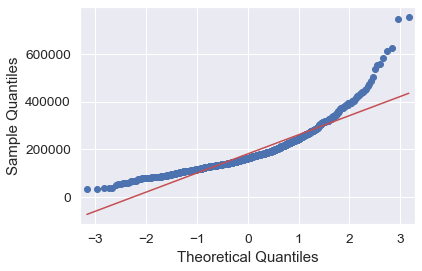

In [41]:
qqplot(train_rem['SalePrice'], line='s')
pyplot.show()
# might be good to remove houses > 600K. Maybe do it later

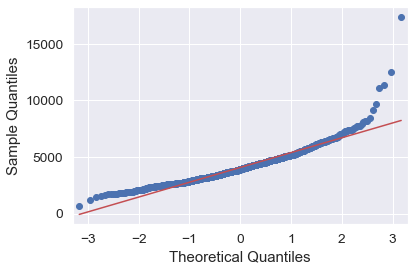

In [42]:
qqplot(train_rem['totSqFt'], line='s')
pyplot.show()

In [43]:
# checking outliers
# train_rem[train_rem['totSqFt']>10000]
# train_rem[train_rem['SalePrice']>700000]
# Seems that removing a house with totSqFt > 10000 is a good idea
train_rem.drop(train_rem[train_rem.totSqFt>10000].index, inplace = True)
# Same for SalePrice > 700000
train_rem.drop(train_rem[train_rem.SalePrice>700000].index, inplace = True)

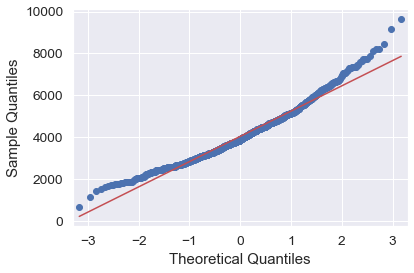

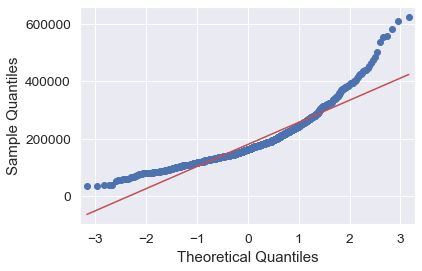

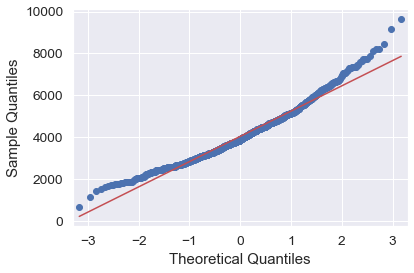

In [44]:
# Rebuilding normality plots
qqplot(train_rem['SalePrice'], line='s')
qqplot(train_rem['totSqFt'], line='s')

(array([  5.,   7.,  30., 129., 351., 385., 230., 111.,  39.,   9.]),
 array([10.46024211, 10.74876859, 11.03729507, 11.32582155, 11.61434804,
        11.90287452, 12.191401  , 12.47992748, 12.76845396, 13.05698045,
        13.34550693]),
 <a list of 10 Patch objects>)

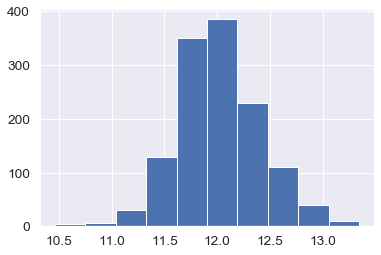

In [45]:
# train['SalePrice'].describe()
# plt.hist(train_rem['SalePrice'],bins = 20, log=True) 
# plt.figure()
# plt.hist(train_rem['SalePrice'], bins = 20) 
plt.hist(np.log(train_rem['SalePrice']))

### Encoding categorical features using dummy variables

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [47]:
# Do all the feature processing on the test set --> save to test_rem
# Combine train_rem and test_rem dropping SalePrice from the first
# Do encoding
# transform SalePrice using box-cox 
# Put train and test separately, add back SalePrice

In [48]:
# doing feature engineering on the test set

# turning object columns into category columns
for i in test.select_dtypes(include='object').columns.to_list():
    test[i] = train[i].astype('category')

test['Remodeled Y/N'] = np.where(test['YearRemodAdd'] ==test['YearBuilt'], 'No', 'Yes')
test['Age when Sold'] = test['YrSold'] - test['YearRemodAdd']

test['totSqFt'] = test['TotalBsmtSF'] + test['GrLivArea'] + test['1stFlrSF'] + test['2ndFlrSF']

test['totBath'] = test['FullBath'] + 0.5*test['HalfBath'] + test['BsmtFullBath'] + 0.5*test['BsmtHalfBath']

test['Remodeled Y/N']=test['Remodeled Y/N'].astype('category')

In [49]:
cols_2_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','Id','2ndFlrSF',
                'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','BsmtFinSF2','3SsnPorch','GarageYrBlt']
test_rem = test.copy()
test_rem.drop(cols_2_remove, axis = 1, inplace = True)


In [50]:
# set(train_rem.columns).intersection(set(test_rem.columns))
# test_rem[(train_rem[test_rem.columns]!=test_rem.values).columns]

In [51]:
# train_rem.shape
# test_rem.shape
# test_rem[(train_rem[test_rem.columns]!=test_rem.values).columns]
# train_rem.columns.to_list() == test_rem.columns.to_list()
# test_rem.columns.to_list() == combo.columns.to_list()

In [52]:
sp = train_rem['SalePrice']

In [53]:
#Add new column Status to both sets to differentiate between the two
train_1 = train_rem.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test_rem.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [81]:
# train_1.shape
# test_1.shape
combo.shape

(2755, 70)

In [55]:
# combo['Remodeled Y/N'] = combo['Remodeled Y/N'].astype('category') 

In [82]:
list(set(combo.columns.to_list()) ^ set(train_rem.columns.to_list()))

['Status', 'SalePrice']

In [57]:
X = combo.copy()
St = X['Status']
X.drop('Status', axis = 1, inplace = True)

In [58]:
combo['Status'].value_counts()
St.value_counts()

Test Set     1459
Train Set    1296
Name: Status, dtype: int64

In [59]:
X_cat = X.select_dtypes(include=['category'])
X_num = X.select_dtypes(exclude=['category'])

In [60]:
X_encoded = pd.get_dummies(X_cat)

In [61]:
print("X_encoded = {}\nX_num = {}\nSt = {}".format(X_encoded.shape,X_num.shape, St.shape))

X_encoded = (2755, 264)
X_num = (2755, 25)
St = (2755,)


In [62]:
frames = [X_encoded, X_num, St]
combo_enc = pd.concat(frames, axis = 1)

In [63]:
print('Combined set is {}'.format(combo_enc.shape))

Combined set is (2755, 290)


In [64]:
# cut into train and test sets back again
# add SalePrice back to the train set

In [65]:
train_enc = combo_enc.loc[combo_enc['Status']=='Train Set']
test_enc = combo_enc.loc[combo_enc['Status']=='Test Set']

In [66]:
print('Encoded Train set is {}\nEncoded Test set is {}'.format(train_enc.shape,test_enc.shape))

Encoded Train set is (1296, 290)
Encoded Test set is (1459, 290)


In [67]:
# doing np.log on SalePrice
sp = np.log(sp)
# adding SalePrice to Encoded Train set
fr = [train_enc, sp]
train_enc = pd.concat(fr, axis = 1)

In [68]:
print('New shape of train_enc is {}'.format(train_enc.shape))

New shape of train_enc is (1296, 291)


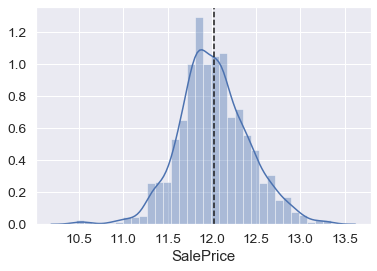

In [69]:
sns.distplot(train_enc['SalePrice'])
plt.axvline(train_enc['SalePrice'].mean(), color="k", linestyle="--")

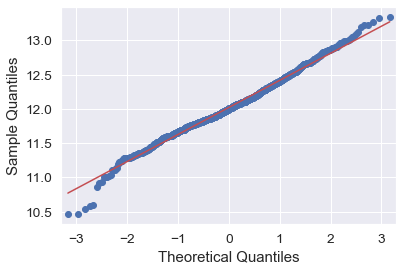

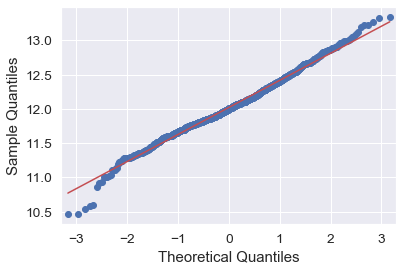

In [70]:
qqplot(train_enc['SalePrice'], line='s')

In [71]:
features = train_enc.drop(['SalePrice','Status'], axis = 1)
result = train_enc['SalePrice']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 12)

# Machine Learning part

### Base case with a regression

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
lg = LinearRegression()
lg.fit(X_train, y_train)
prediction_1 = lg.predict(X_test)

In [77]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [78]:
# r2_score(y_test, prediction_1)
mean_squared_error(y_test, prediction_1)

1.0095957882763975e+27

In [ ]:
plt.scatter(y_test, prediction_1)

### Regression and lasso

In [ ]:
# Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train_ohe, y_train)

In [ ]:
predictions_lr = lr.predict(X_test_ohe)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [ ]:
print("Explained variance is {}\nR-squared is {}".format(explained_variance_score(y_test, predictions_lr),
     r2_score(y_test, predictions_lr)))


In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_test, predictions_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("For the test set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test,predictions_lr)),
                                                                           r2_score(y_test, predictions_lr)))
print("For the train set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_train,pred_test_lr)),
                                                                            r2_score(y_train, pred_test_lr)))


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_ohe, y_train)

In [ ]:
pred_train_lasso= model_lasso.predict(X_train_ohe)
pred_test_lasso= model_lasso.predict(X_test_ohe)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_test,pred_test_lasso)), r2_score(y_test, pred_test_lasso)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_train,pred_train_lasso)), r2_score(y_train, pred_train_lasso)))

In [ ]:
# GridSearch for lasso parameters

In [ ]:
# cross-validation
# lasso and another cross-validation. GridSearch for lasso and another cross-validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='r2', cv=3, return_train_score = True)   
print("R2 Scores are {}\nIts mean is {}".format(sc['test_score'],sc['test_score'].mean()))

In [ ]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='explained_variance', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

In [ ]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='max_error', cv=3, return_train_score = True)   
print(sc['test_score'].mean())